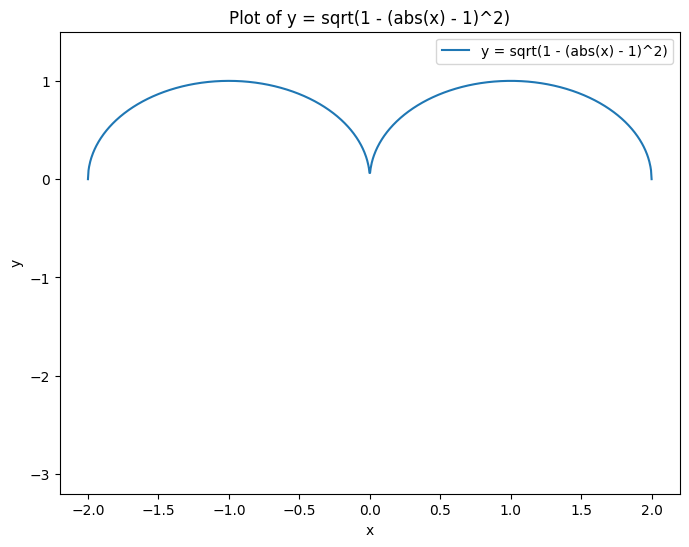

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation
x = np.linspace(-2, 2, 1000)
y_upper = np.sqrt(1 - (abs(x) - 1)**2)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_upper, label='y = sqrt(1 - (abs(x) - 1)^2)')
plt.title('Plot of y = sqrt(1 - (abs(x) - 1)^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3.2, 1.5)
plt.legend()
plt.show()


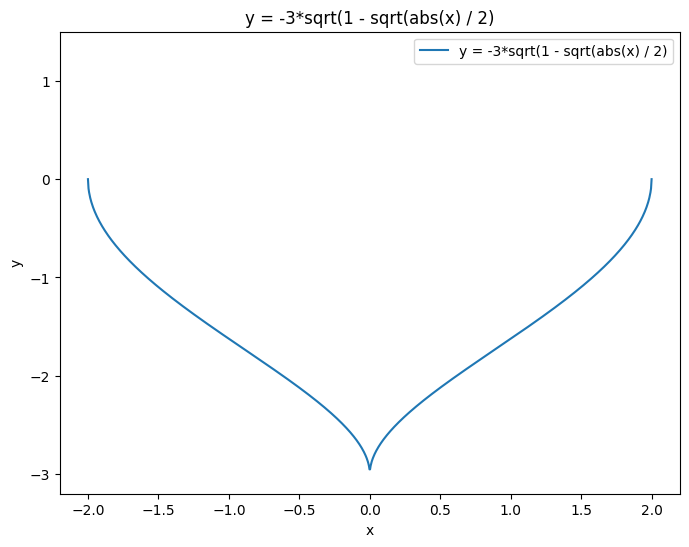

In [7]:
y_lower = -3 * np.sqrt(1 - np.sqrt(abs(x) / 2))

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_lower, label='y = -3*sqrt(1 - sqrt(abs(x) / 2)')
plt.title('y = -3*sqrt(1 - sqrt(abs(x) / 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3.2, 1.5)
plt.legend()
plt.show()

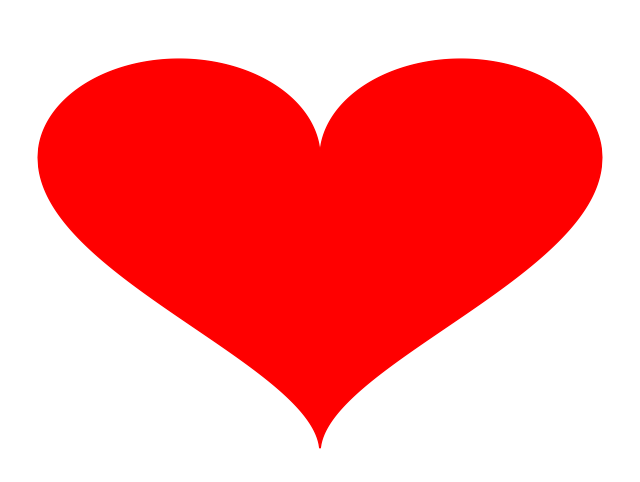

In [8]:
# Setting up the range for x
x = np.linspace(-2, 2, 1000)

# Creating a combined y array for the entire heart
y_combined = np.append(y_upper, y_lower[::-1]) # reverse order ::-1
x_combined = np.append(x, x[::-1])

# Plotting the adjusted heart
plt.figure(figsize=(8, 6))
plt.fill(x_combined, y_combined, color='red')
plt.xlim(-2.2, 2.2)
plt.ylim(-3.2, 1.5)
plt.axis('off') # Turn off the axis
plt.show()


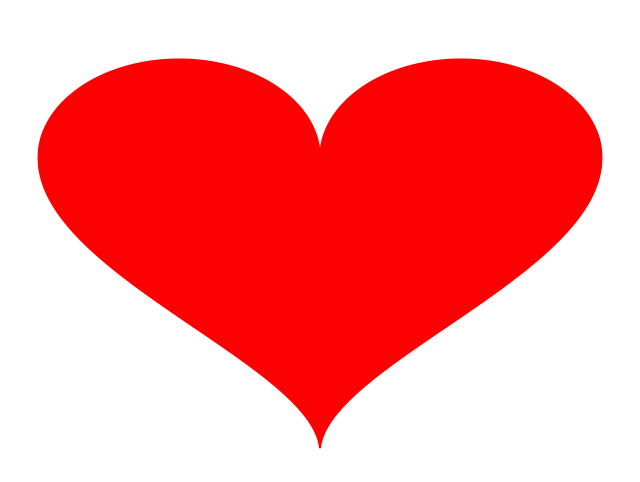

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Define the heart shape
x = np.linspace(-2, 2, 1000)
y_upper = np.sqrt(1 - (abs(x) - 1)**2)
y_lower = -3 * np.sqrt(1 - np.sqrt(abs(x) / 2))
y_combined = np.append(y_upper, y_lower[::-1])
x_combined = np.append(x, x[::-1])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-3.2, 1.5)
ax.axis('off')

# Initial plot (red heart)
heart, = ax.fill(x_combined, y_combined, color='red')

# Define a sequence of colors for the animation
colors = [
    (1, 0, 0),      # red
    (1, 0.84, 0),   # gold
    (0, 0.5, 0.5),  # teal
    # Add more colors as needed
    (1, 0, 0)       # red again, to complete the loop
]

# Calculate the number of frames per color transition
frames_per_color = 100

# Animation update function
def update(frame):
    color_index = frame // frames_per_color
    next_color_index = (color_index + 1) % len(colors)
    t = (frame % frames_per_color) / frames_per_color
    r = (1 - t) * colors[color_index][0] + t * colors[next_color_index][0]
    g = (1 - t) * colors[color_index][1] + t * colors[next_color_index][1]
    b = (1 - t) * colors[color_index][2] + t * colors[next_color_index][2]
    heart.set_facecolor((r, g, b))
    return heart,

# Create the animation
total_frames = frames_per_color * (len(colors) - 1)
ani = FuncAnimation(fig, update, frames=total_frames, interval=50, blit=True, repeat=True)

# Save the animation as a GIF using PillowWriter
gif_path = "heart_animation_loop.gif"
ani.save(gif_path, writer=PillowWriter(fps=20))
